In [6]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Prevent TF eating all the GPU memory and crashing the machine

In [7]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


Check that we can load MIDI files

In [8]:
from pathlib import Path
import midifile

midi_file_path = Path('MIDI/closer_2.mid')
mf = midifile.file2mf(midi_file_path); 
mf

<music21.midi.MidiFile 21 tracks>

In [9]:
stream = midifile.mf2stream(mf)
stream.show('text')

{0.0} <music21.stream.Part 0x7ff1925443a0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.instrument.AcousticGuitar 'Overdriven Guitar: Overdriven Guitar'>
        {0.0} <music21.instrument.ElectricGuitar 'Electric Guitar'>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.tempo.MetronomeMark maestoso Quarter=90.0>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest whole>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Rest whole>
    {8.0} <music21.stream.Measure 3 offset=8.0>
        {0.0} <music21.note.Rest whole>
    {12.0} <music21.stream.Measure 4 offset=12.0>
        {0.0} <music21.note.Rest whole>
    {16.0} <music21.stream.Measure 5 offset=16.0>
        {0.0} <music21.note.Rest whole>
    {20.0} <music21.stream.Measure 6 offset=20.0>
        {0.0} <music21.note.Rest whole>
    {24.0} <music21.stream.Measure 7 offset=24.0>
        {0.0} <music2

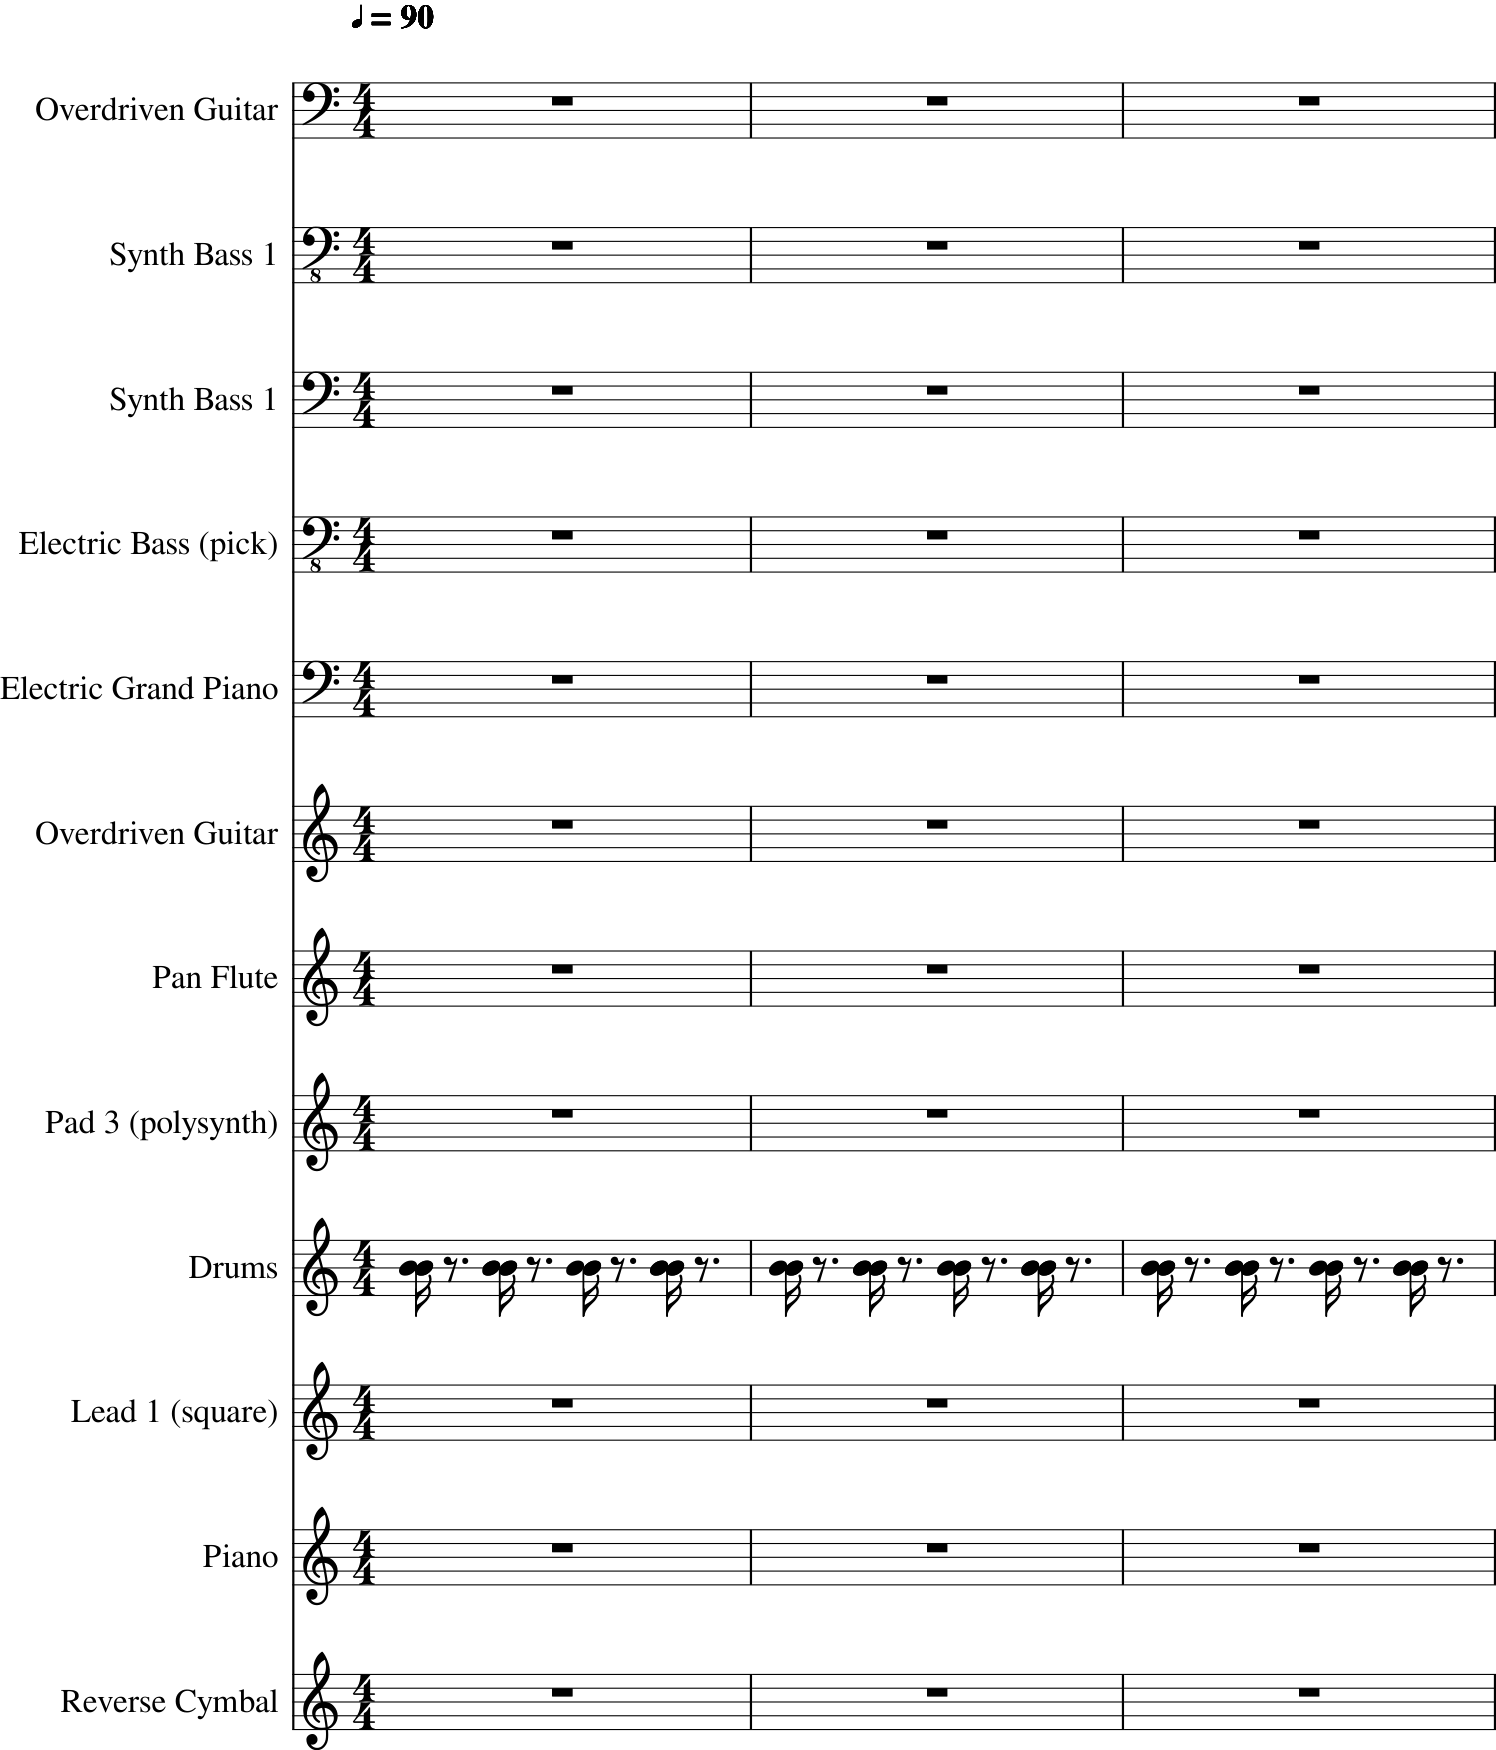

In [10]:
import music21

musescore_path = '/usr/bin/mscore'
music21.environment.set('musicxmlPath', musescore_path)
music21.environment.set('musescoreDirectPNGPath', musescore_path)

stream.show()